In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import joblib

import tensorflow as tf

2024-09-11 12:33:38.282336: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-11 12:33:38.347295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 12:33:39.494373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
hd = pd.read_csv('boston_housing.csv')

<AxesSubplot: xlabel='RM', ylabel='PRICE'>

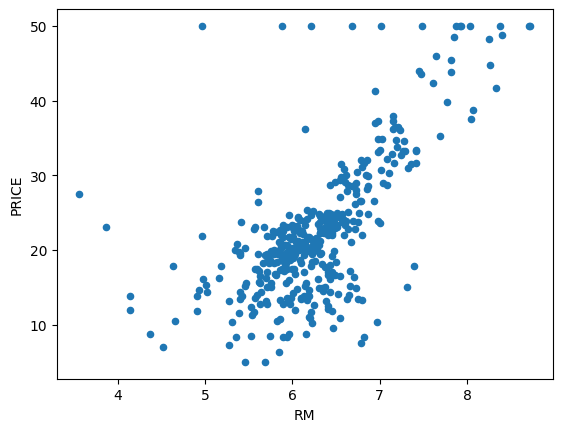

In [3]:
hd.plot.scatter(x='RM',y='PRICE')

In [4]:
nhdi = hd[(hd['PRICE'] > 45) | (hd['RM'] < 4)].index

In [5]:
nhd = hd.drop(nhdi)

<AxesSubplot: xlabel='RM', ylabel='PRICE'>

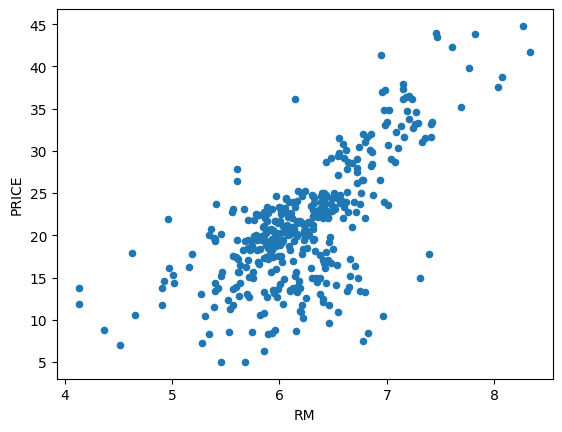

In [6]:
nhd.plot.scatter(x='RM',y='PRICE')

In [7]:
x_train,y_train = nhd.RM.values[:-100], nhd.PRICE.values[:-100]

In [8]:
x_test,y_test = nhd.RM.values[-100:], nhd.PRICE.values[-100:]

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(1))


In [10]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [11]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=300,verbose=2)

Epoch 1/300
8/8 - 1s - loss: 197.5537 - root_mean_squared_error: 14.0554 - val_loss: 208.2843 - val_root_mean_squared_error: 14.4321 - 774ms/epoch - 97ms/step
Epoch 2/300
8/8 - 0s - loss: 195.4761 - root_mean_squared_error: 13.9813 - val_loss: 206.5290 - val_root_mean_squared_error: 14.3711 - 39ms/epoch - 5ms/step
Epoch 3/300
8/8 - 0s - loss: 193.8788 - root_mean_squared_error: 13.9240 - val_loss: 204.9566 - val_root_mean_squared_error: 14.3163 - 39ms/epoch - 5ms/step
Epoch 4/300
8/8 - 0s - loss: 192.3766 - root_mean_squared_error: 13.8700 - val_loss: 203.4102 - val_root_mean_squared_error: 14.2622 - 42ms/epoch - 5ms/step
Epoch 5/300
8/8 - 0s - loss: 190.9371 - root_mean_squared_error: 13.8180 - val_loss: 201.9542 - val_root_mean_squared_error: 14.2111 - 40ms/epoch - 5ms/step
Epoch 6/300
8/8 - 0s - loss: 189.5113 - root_mean_squared_error: 13.7663 - val_loss: 200.4629 - val_root_mean_squared_error: 14.1585 - 39ms/epoch - 5ms/step
Epoch 7/300
8/8 - 0s - loss: 188.0894 - root_mean_square

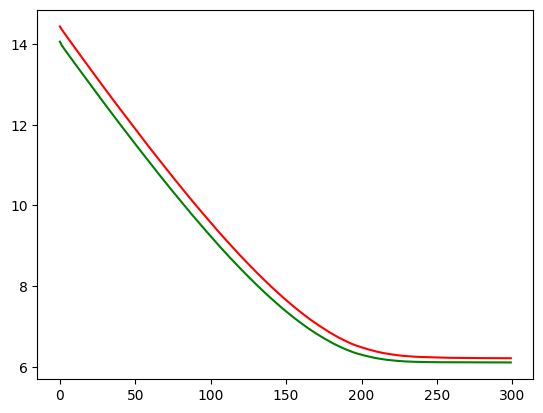

In [12]:
plot.plot(history.history['root_mean_squared_error'],color='g')
plot.plot(history.history['val_root_mean_squared_error'],color='r')


In [13]:
x = tf.linspace(4,12,10)

In [14]:
y = model.predict(x)

1/1 [==============================] - 0s 89ms/step


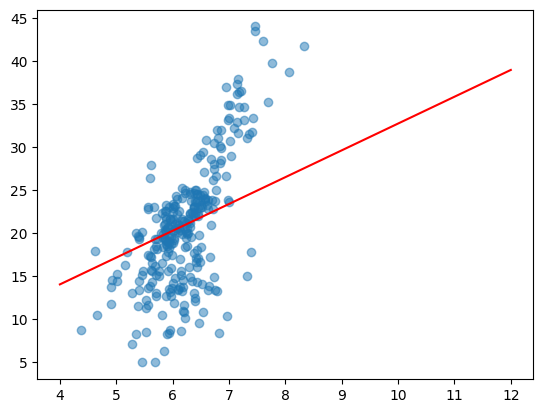

In [15]:
plot.scatter(x_train,y_train,alpha=0.5)
plot.plot(x,y,color='red')